<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/Cooker_W4_24_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d7d84c8b7b93a4bf353eb452e46088940ac02eaa76f0013e2714d45b97c37711
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


64.99999999999993


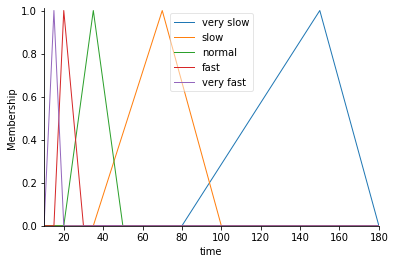

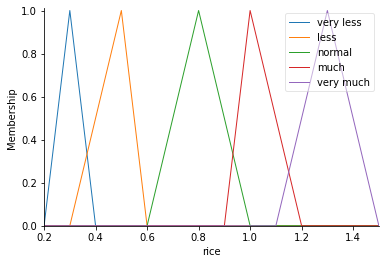

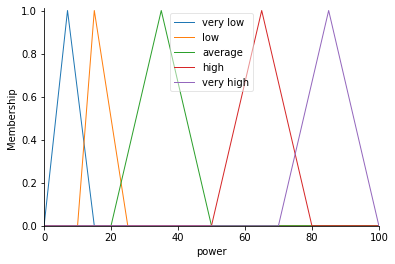

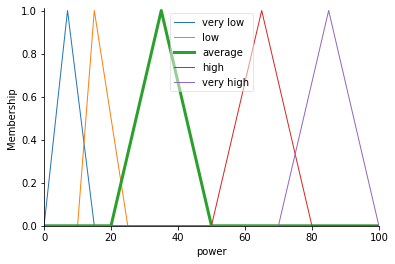

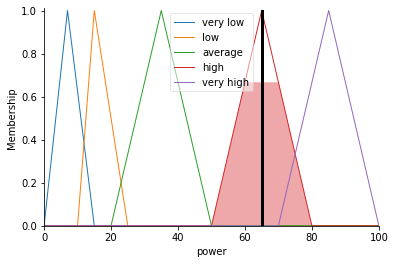

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,181,1),'time')
rice=ctrl.Antecedent(np.arange(0.2,1.6,0.1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')
time['very slow']=fuzz.trimf(time.universe,[80,150,180])
time['slow']=fuzz.trimf(time.universe,[35,70,100])
time['normal']=fuzz.trimf(time.universe,[20,35,50])
time['fast']=fuzz.trimf(time.universe,[15,20,30])
time['very fast']=fuzz.trimf(time.universe,[10,15,20])
rice['very less']=fuzz.trimf(rice.universe,[0.2,0.3,0.4])
rice['less']=fuzz.trimf(rice.universe,[0.3,0.5,0.6])
rice['normal']=fuzz.trimf(rice.universe,[0.6,0.8,1])
rice['much']=fuzz.trimf(rice.universe,[0.9,1,1.2])
rice['very much']=fuzz.trimf(rice.universe,[1.1,1.3,1.5])
power['very low']=fuzz.trimf(power.universe,[0,7,15])
power['low']=fuzz.trimf(power.universe,[10,15,25])
power['average']=fuzz.trimf(power.universe,[20,35,50])
power['high']=fuzz.trimf(power.universe,[50,65,80])
power['very high']=fuzz.trimf(power.universe,[70,85,100])
time.view()
rice.view()
power.view()
power['average'].view()
rule1=ctrl.Rule(time['very slow'] & rice['very less'],power['very low'])
rule2=ctrl.Rule(time['very slow'] & rice['less'],power['very low'])
rule3=ctrl.Rule(time['very slow'] & rice['normal'],power['low'])
rule4=ctrl.Rule(time['very slow'] & rice['much'],power['average'])
rule5=ctrl.Rule(time['very slow'] & rice['very much'],power['average'])

rule6=ctrl.Rule(time['slow'] & rice['very less'],power['very low'])
rule7=ctrl.Rule(time['slow'] & rice['less'],power['low'])
rule8=ctrl.Rule(time['slow'] & rice['normal'],power['low'])
rule9=ctrl.Rule(time['slow'] & rice['much'],power['average'])
rule10=ctrl.Rule(time['slow'] & rice['very much'],power['average'])

rule11=ctrl.Rule(time['normal'] & rice['very less'],power['low'])
rule12=ctrl.Rule(time['normal'] & rice['less'],power['low'])
rule13=ctrl.Rule(time['normal'] & rice['normal'],power['average'])
rule14=ctrl.Rule(time['normal'] & rice['much'],power['high'])
rule15=ctrl.Rule(time['normal'] & rice['very much'],power['high'])

rule16=ctrl.Rule(time['fast'] & rice['very less'],power['average'])
rule17=ctrl.Rule(time['fast'] & rice['less'],power['average'])
rule18=ctrl.Rule(time['fast'] & rice['normal'],power['high'])
rule19=ctrl.Rule(time['fast'] & rice['much'],power['high'])
rule20=ctrl.Rule(time['fast'] & rice['very much'],power['very high'])

rule21=ctrl.Rule(time['very fast'] & rice['very less'],power['high'])
rule22=ctrl.Rule(time['very fast'] & rice['less'],power['high'])
rule23=ctrl.Rule(time['very fast'] & rice['normal'],power['very high'])
rule24=ctrl.Rule(time['very fast'] & rice['much'],power['very high'])
rule25=ctrl.Rule(time['very fast'] & rice['very much'],power['very high'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25]) #taphopcacluat
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=30
tipping.input['rice']=1
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)